<font color='Black' size='10'> Mitali Barhanpurkar _ Assignment 1 : Congressional Elections </font>

In [1]:
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#To change the directory
import os
os.chdir('C:\\Users\\MITALI\\Desktop\\courses\\Fall17\\Python\\congressional election')

In [3]:
#Read the 4 csv files
ifile=pd.read_csv('all_house_senate_2010.csv')
ifile2=pd.read_csv('all_house_senate_2012.csv')
ifile3=pd.read_csv('all_house_senate_2014.csv')
ifile4=pd.read_csv('all_house_senate_2016.csv',encoding = "ISO-8859-1")

C:\Users\MITALI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\MITALI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\MITALI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
%matplotlib inline
#clean the disbursement amount column to remove '$' and '()' and this is used throughtout
x1=[] 
x1=(ifile['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float))
x2=[]
x2=(ifile2['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float))
x3=[]
x3=(ifile3['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float))
x4=[]
x4=(ifile4['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float))

In [5]:
#make a new column in the datafile to copy the disbursement amount after cleaning it
ifile['month']=pd.DatetimeIndex(ifile['dis_dat']).month
ifile['money']=(ifile['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float))

In [6]:
#combine disbursement amount from all data files into list combined_money
combined_money=[]
combined_money.extend(x1)
combined_money.extend(x2)
combined_money.extend(x3)
combined_money.extend(x4)

In [7]:
#combine election year from all data files into list combined_year
combined_year=[]
combined_year.extend(ifile['ele_yea'])
combined_year.extend(ifile2['ele_yea'])
combined_year.extend(ifile3['ele_yea'])
combined_year.extend(ifile4['ele_yea'])

Since Dibursement amount was the only quantitative field, most of the visualizations use this field to show a pattern among various fields

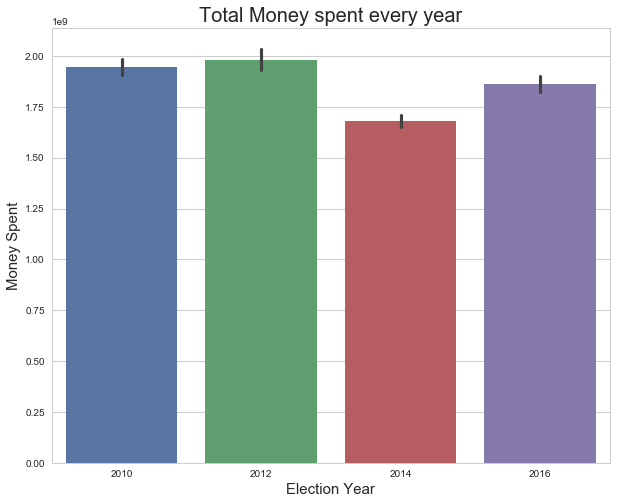

In [10]:
#Fig -1 :This figure shows total money spent across the four years we have data on
sns.set(style="whitegrid", color_codes=True)
fig1=sns.barplot(x=combined_year,y=combined_money,estimator=sum)
fig1.figure.set_size_inches(10,8)
plt.xlabel("Election Year",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Total Money spent every year",fontsize=20)

In [11]:
#combines the candidate office states from all four data files into combined_state list
combined_state=[]
combined_state.extend(ifile['can_off_sta'])
combined_state.extend(ifile2['can_off_sta'])
combined_state.extend(ifile3['can_off_sta'])
combined_state.extend(ifile4['can_off_sta'])

Figure 1 shows total expenditures across 4 years but the below graph shows it split across different states in USA

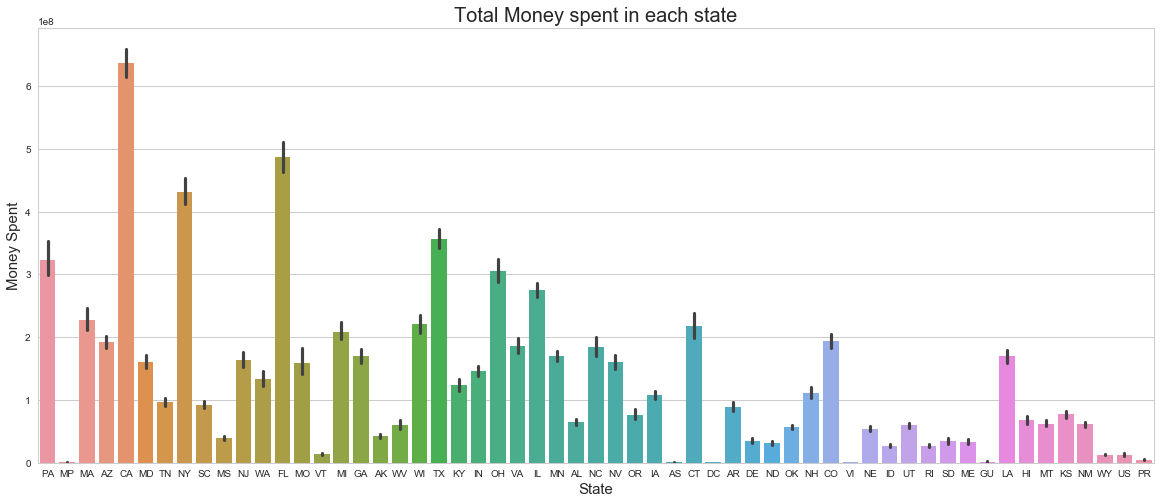

In [12]:
#Fig -2 :This figure shows total money spent in each state of US
fig2=sns.barplot(x=combined_state, y=combined_money,estimator=sum)
fig2.figure.set_size_inches(20,8)
plt.xlabel("State",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Total Money spent in each state",fontsize=20)

In [13]:
#combined disbursement amount category description from all four data files into combined_cat list
combined_cat=[]
combined_cat.extend(ifile['cat_des'])
combined_cat.extend(ifile2['cat_des'])
combined_cat.extend(ifile3['cat_des'])
combined_cat.extend(ifile4['cat_des'])

The below graph shows money spent across different categories. This tells us the priority area in which the candidates spend from most to least.

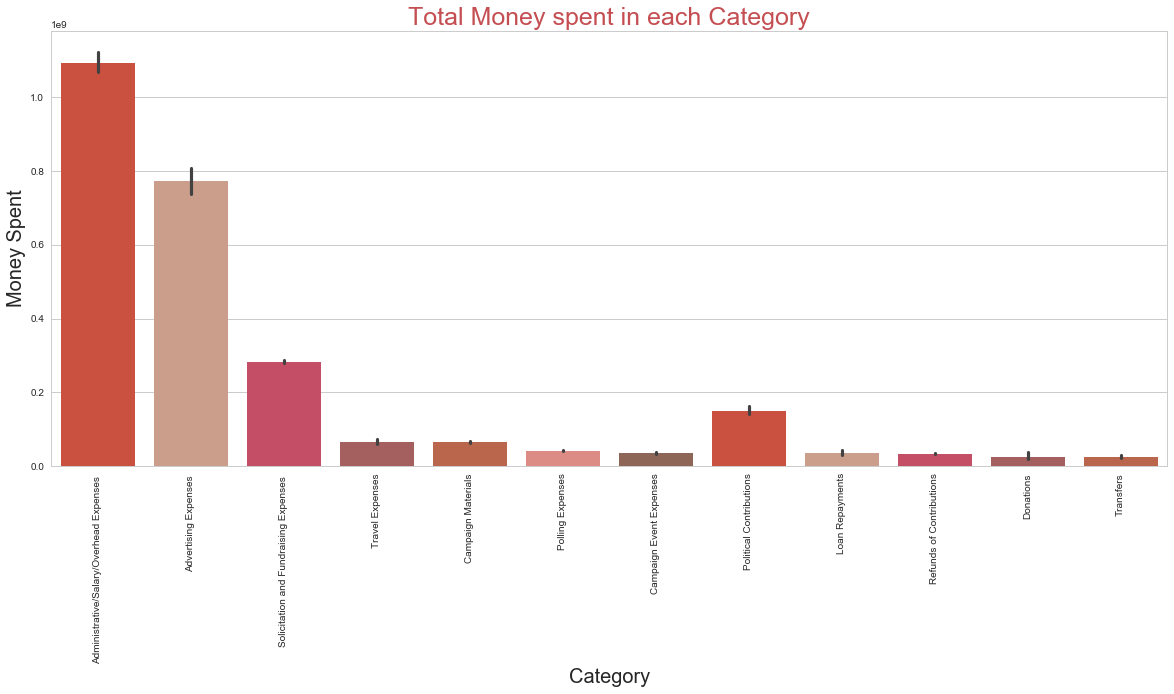

In [15]:
#Fig 3: plot to visualize split of money expenditures across categories.
col =["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
fig3=sns.barplot(x=combined_cat,y=combined_money,estimator=sum, palette = sns.color_palette(col))
fig3.figure.set_size_inches(20,8)
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
plt.xlabel("Category",size=20)
plt.ylabel("Money Spent",size=20)
plt.title("Total Money spent in each Category",fontsize=25,color='r')

After understading the trends in expenditure across years, state and category I wanted to see the maximum amount disbursed in each year, just curious!

In [16]:

combined_canoff=ifile[['can_off','can_id']].copy()
combined_canoff['can_off'].append(ifile2['can_off'])
combined_canoff['can_off'].unique()

array(['H', 'S'], dtype=object)

In [17]:
#finds the maximum amount spent in each year and assigns them to 4 different variables
a1=max(ifile['money'])
a2=max(x2)
a3=max(x3)
a4=max(x4)

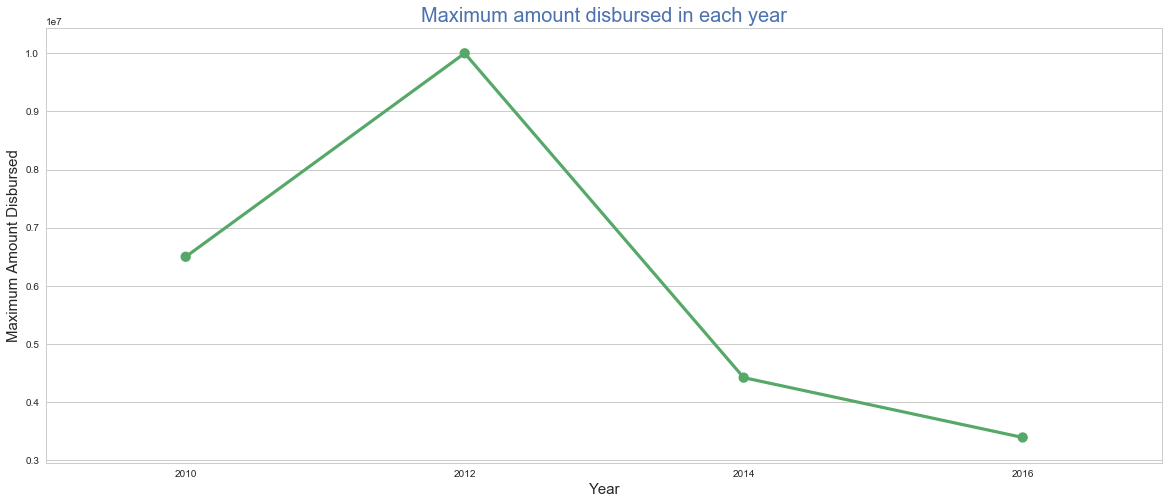

In [19]:
#Fig 4: Plot to show the maximum amount disbursed
fig4=sns.pointplot(x=[2010, 2012, 2014, 2016], y=[a1, a2, a3, a4],color='g')
fig4.figure.set_size_inches(20,8)
plt.xlabel("Year",size=15)
plt.ylabel("Maximum Amount Disbursed",size=15)
plt.title("Maximum amount disbursed in each year",fontsize=20,color='b')

Having observed tends in expenditure, I next wanted to explore the trends in number of candidates participating in the elections

In [20]:
#To count the uniqe number of candidates participating in each year
count1=len(ifile['can_nam'].unique())
count2=len(ifile2['can_nam'].unique())
count3=len(ifile3['can_nam'].unique())
count4=len(ifile4['can_nam'].unique())
noofcan=[count1, count2, count3, count4]

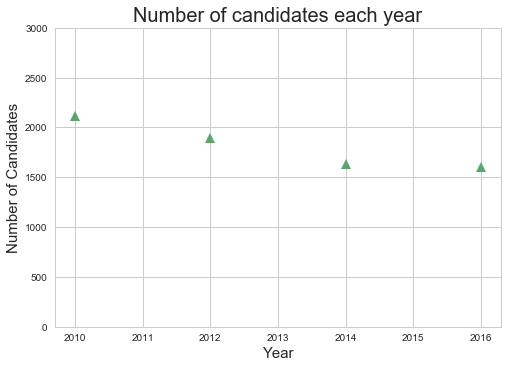

In [29]:
#Fig 5: Plot to show maximum amount spent in each year
plt.plot([2010, 2012, 2014, 2016],noofcan,'g^',markersize=10)
plt.ylim([0,3000])
plt.xlabel("Year",size=15)
plt.ylabel("Number of Candidates",size=15)
plt.title("Number of candidates each year",fontsize=20)
plt.show()

It would be interesting to note how money spent trend according to the candidates office.

In [25]:
# To combine candidate ID's from data files into combined_canid list
combined_canid=[]
combined_canid.extend(ifile['can_id'])
combined_canid.extend(ifile2['can_id'])
combined_canid.extend(ifile3['can_id'])
combined_canid.extend(ifile4['can_id'])

In [26]:
#As combined_canid, this cell combines candidate office columns from data files into the com_canoff list
com_canoff=[]
com_canoff.extend(ifile['can_off'])
com_canoff.extend(ifile2['can_off'])
com_canoff.extend(ifile3['can_off'])
com_canoff.extend(ifile4['can_off'])

In [28]:
# This cell creates a dataframe that has combined candidate office and candidate Id's in two columns : can_off and Can_id
frames=pd.DataFrame({'can_off' : com_canoff, 'can_id' : combined_canid})
#frames['can_off']=[ifile['can_off'],ifile2['can_off'],ifile3['can_off'],ifile4['can_off']]
#coff=pd.concat(frames)

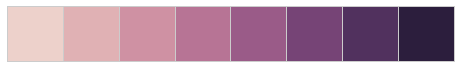

In [31]:
sns.palplot(sns.cubehelix_palette(8))

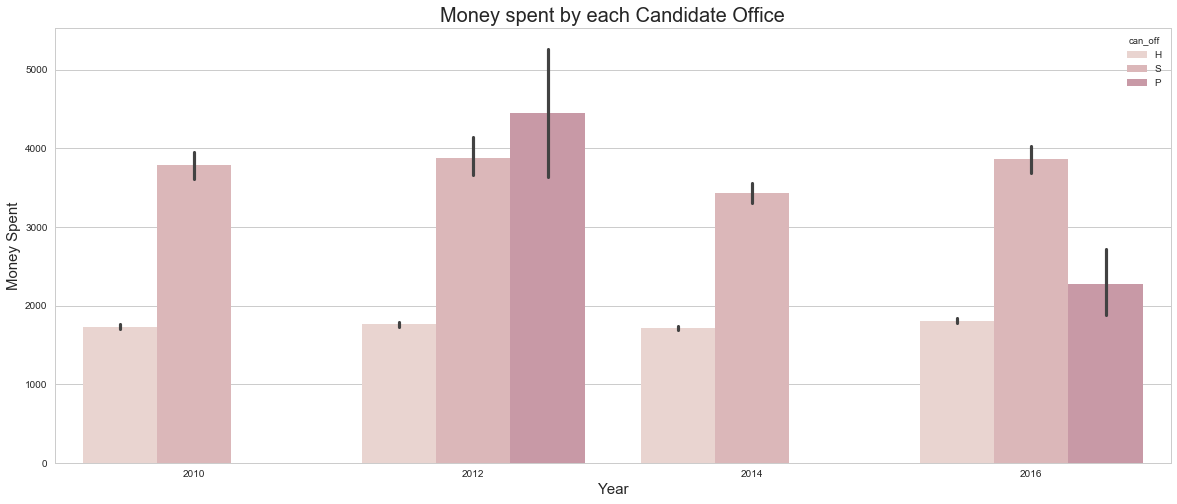

In [32]:
#Fig 6: Plot to show trends among money spent by different candidate office in four years
fig6=sns.barplot(x=combined_year, y=combined_money, hue=frames['can_off'],palette=sns.cubehelix_palette(8))
fig6.figure.set_size_inches(20,8)
plt.xlabel("Year",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Money spent by each Candidate Office",fontsize=20)
plt.show()

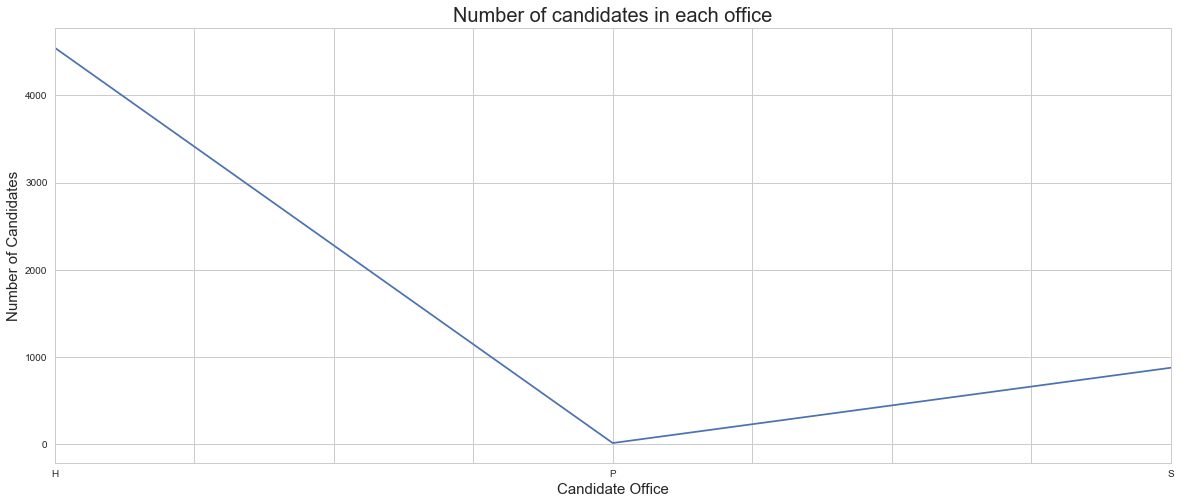

In [33]:
#Fig 7: The figure shows number of candidates in each office
fig7=frames.groupby(['can_off'])['can_id'].nunique().plot()
fig7.figure.set_size_inches(20,8)
plt.xlabel("Candidate Office",size=15)
plt.ylabel("Number of Candidates",size=15)
plt.title("Number of candidates in each office",fontsize=20)
plt.show()

After having looked into the various trends of money spent collectively over the years, it would be interesting to see in what month of the year did most of these  transactions happen

In [34]:
#This cell helps in extracting month from the date column
ifile3['date']=pd.to_datetime(ifile3['dis_dat'], format='%Y-%m-%d', errors='coerce')
ifile3['month']=ifile3['date'].dt.month
ifile2['date']=pd.to_datetime(ifile2['dis_dat'], format='%Y-%m-%d', errors='coerce')
ifile2['month']=ifile2['date'].dt.month
ifile4['date']=pd.to_datetime(ifile4['dis_dat'], format='%Y-%m-%d', errors='coerce')
ifile4['month']=ifile4['date'].dt.month

In [35]:
#Extracted months in transactions occured are combined in the combined_month list
combined_month=[]
combined_month.extend(ifile['month'])
combined_month.extend(ifile2['month'])
combined_month.extend(ifile3['month'])
combined_month.extend(ifile4['month'])

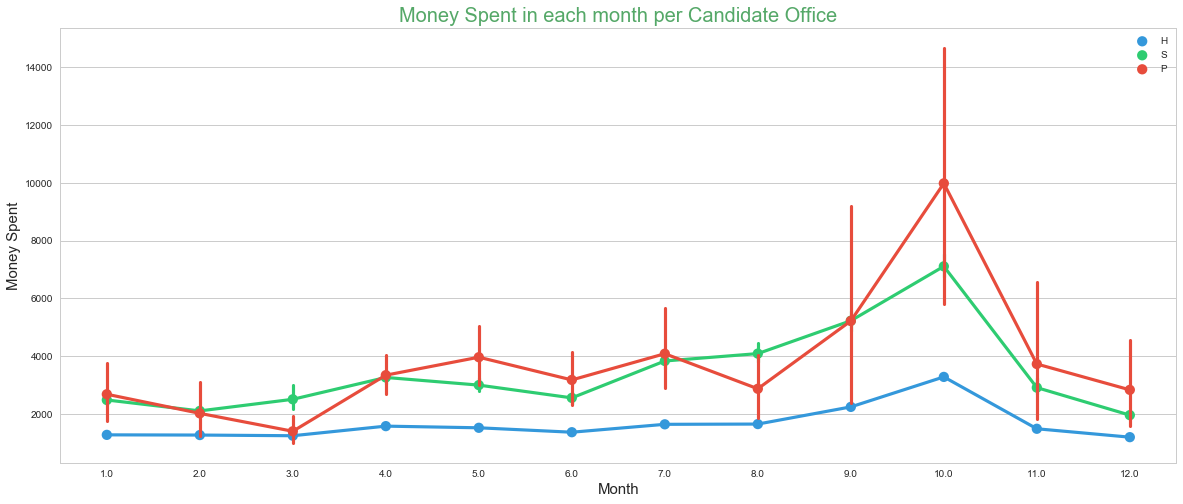

In [36]:
#Fig 8: Figure to show trends on money spent across 12 months differentiated by the candidate office
col2=["#3498db", "#2ecc71","#e74c3c"]
fig8=sns.pointplot(x=combined_month,y=combined_money,hue=com_canoff,palette=col2)
fig8.figure.set_size_inches(20,8)
plt.xlabel("Month",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Money Spent in each month per Candidate Office",fontsize=20,color='g')
plt.show()

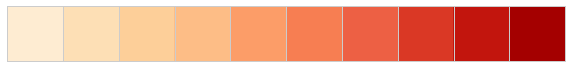

In [37]:
sns.palplot(sns.color_palette("OrRd", 10))

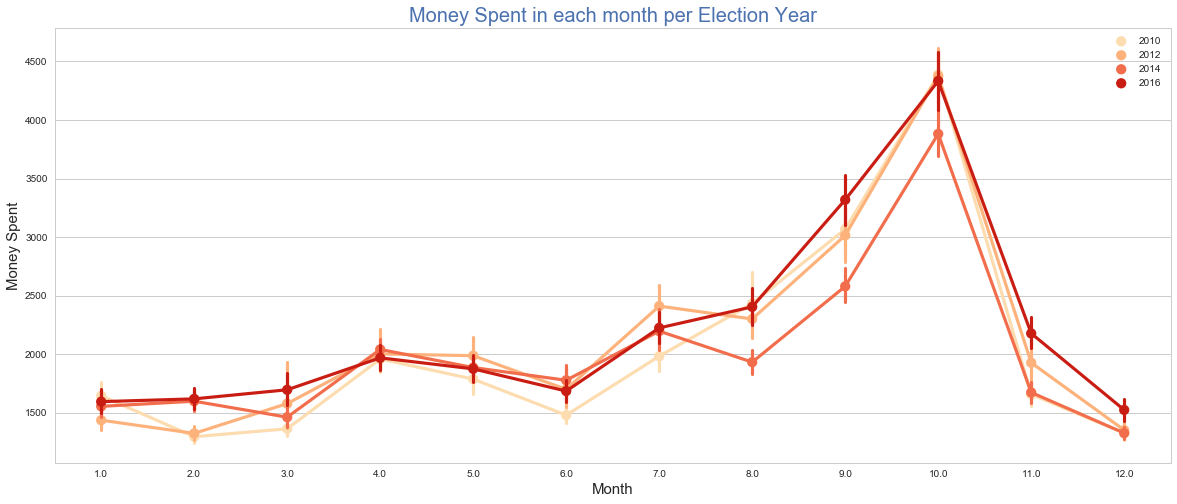

In [38]:
#Fig 9: Figure to show trends on money spent across 12 months differentiated by year
fig9 = sns.pointplot(combined_month,combined_money,hue=combined_year,palette="OrRd")
#plt.subplot(ifile2['month'],x2) #,ifile3['month'],x3,'g^',ifile4['month'],x4,'ro'))
fig9.figure.set_size_inches(20,8)
plt.xlabel("Month",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Money Spent in each month per Election Year",fontsize=20,color='b')
plt.show()

It would also be interesting to see the top 5 spenders among candidates of all 4 years

In [39]:
new=ifile[['can_off_sta','can_nam']].copy()
new['can_off_sta'].append(ifile2['can_off_sta'])
new['can_off_sta'].append(ifile3['can_off_sta'])
new['can_off_sta'].append(ifile4['can_off_sta'])
new['can_nam'].append(ifile2['can_nam'])
new['can_nam'].append(ifile3['can_nam'])
new['can_nam'].append(ifile4['can_nam'])

0                      GERLACH, JIM
1                      GERLACH, JIM
2                      GERLACH, JIM
3                      GERLACH, JIM
4                      GERLACH, JIM
5                      GERLACH, JIM
6                      GERLACH, JIM
7                      GERLACH, JIM
8                      GERLACH, JIM
9                      GERLACH, JIM
10                     GERLACH, JIM
11                     GERLACH, JIM
12                     GERLACH, JIM
13                     GERLACH, JIM
14                     GERLACH, JIM
15                     GERLACH, JIM
16                     GERLACH, JIM
17                     GERLACH, JIM
18                     GERLACH, JIM
19                     GERLACH, JIM
20                     GERLACH, JIM
21                     GERLACH, JIM
22                     GERLACH, JIM
23                     GERLACH, JIM
24                     GERLACH, JIM
25                     GERLACH, JIM
26                     GERLACH, JIM
27                     GERLA

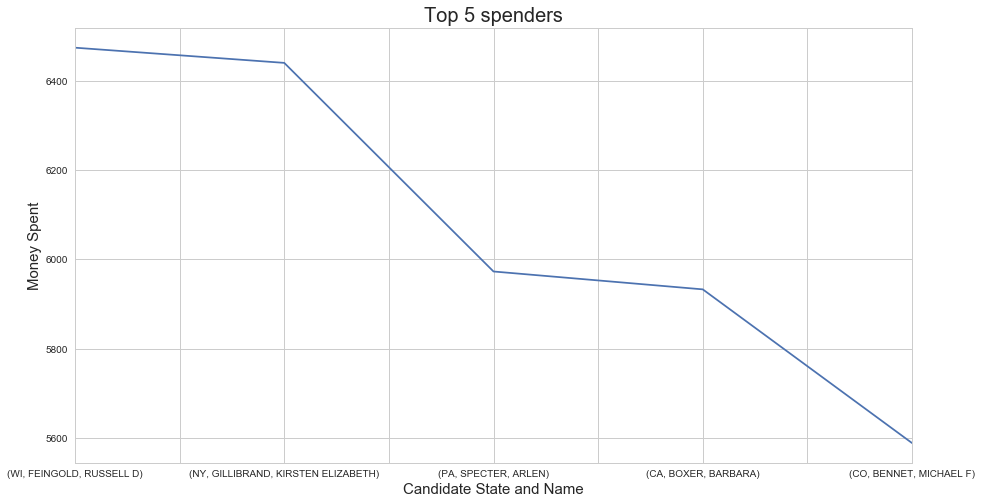

In [40]:
#Fig 10: Top 5 candidates with most number of transaction
fig10=new.groupby(['can_off_sta','can_nam']).size().nlargest(5).plot()
fig10.figure.set_size_inches(15,8)
plt.xlabel("Candidate State and Name",size=15)
plt.ylabel("Money Spent",size=15)
plt.title("Top 5 spenders",fontsize=20)
plt.show()

Insights :

Plotting the above figure gave us insights that maximum amount of money was spent in 2012, this year also had the maximum individual amount disbursed. Collectively for the 4 years, most of the money was spent for Administation, Salary and Overhead expenses. 

We also noticed that maximum expenditures were in the state of California. For the year 2012, expenditures were more from the President office. It was also noticed that though there were minimum candidates in 2016, they still had expenses above average.

We could also notice that expenditures were maximum in the month of October, be it for any candidate office. Most of the candidates were from house office.

Among the amount disbursed until now, over the 4 years, a disbursement of almost $1 million dollar is recorded as highest.Also, Russell D Feingold from WI is observed to be the top spender.